Hello,

Welcome to my Capstone Project for IBM's Data Science Professional Certificate.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

from bs4 import BeautifulSoup
import os

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#import folium # map rendering library

print('Libraries imported.')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                                                           /failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.9|3.6.9|3.6.9|3.6.9|>=3.6,<3.7.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|>=3.7,<3.8.0a0|>=2.7,<2.8.0a0|>=3.5,<3.6.0a0|3.4.*',build='1_73_pypy|2_73_pypy|3_73_pypy|0_73_pypy']
  - geopy -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']
  - rsa -> python[version='2.7.

In [2]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#import folium # map rendering library

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                       -            |failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.9|3.6.9|3.6.9|3.6.9|>=3.6,<3.7.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|>=3.7,<3.8.0a0|>=2.7,<2.8.0a0|>=3.5,<3.6.0a0|3.4.*',build='0_73_pypy|1_73_pypy|2_73_pypy|3_73_pypy']
  - rsa -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']

Your python: python=3.7

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates tha

In [3]:
!pip install folium

     |████████████████████████████████| 93 kB 3.4 MB/s  eta 0:00:01


In [4]:
import folium #Had some issues installing folium and importing. This is why folium is seperated from the other libraries.

In [5]:
#Let us call our FourSquare API Credentials, Insert your own Credentials as each account is unique 
CLIENT_ID = 'ZILMN455J3C22DEHWE0EMHGPJIDLAMGOZN0KOYLW2ABDSMVW' 
CLIENT_SECRET = 'B2TL0WTUE2UC1HOR5EOXBBWNKEDTWFW4JWELFKV4POWX4KLQ' 
VERSION = '20180605' 
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZILMN455J3C22DEHWE0EMHGPJIDLAMGOZN0KOYLW2ABDSMVW
CLIENT_SECRET:B2TL0WTUE2UC1HOR5EOXBBWNKEDTWFW4JWELFKV4POWX4KLQ


In [6]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [7]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [8]:
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [10]:
#Transforming the data into a pandas dataframe
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [11]:
#CheckRows and Columns of the Data Set
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [12]:
#Latitude and longitude for NYC
address = 'New York City, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [13]:
#Base NYC Map with neighborhoods
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=12
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [14]:
#Getting Lat/Long for each neighborhood so that we dont have to keep calling for the coordinates
def geo_location(address):
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [15]:
#Creating a Test to ensure the FourSquare API is connected
search_query = 'Pizza'
radius = 500
print(search_query + ' .... OK!')

Pizza .... OK!


In [16]:
#Function to get venues in the category that we want aka Pizza Place in our project
def get_venues(lat,lng):
    radius=500
    LIMIT=100
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


In [17]:
#Getting the venue details from 4Square
def get_venue_details(venue_id):
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(venue_id,CLIENT_ID, CLIENT_SECRET, VERSION)
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [18]:
#Create a funtion to get the NYC data set if we need it later in the project
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    features=resp['features']
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

In [19]:
ny_data = get_new_york_data()
ny_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [20]:
ny_data.shape
print("There are 306 Rows and 4 Columns of Data")

There are 306 Rows and 4 Columns of Data


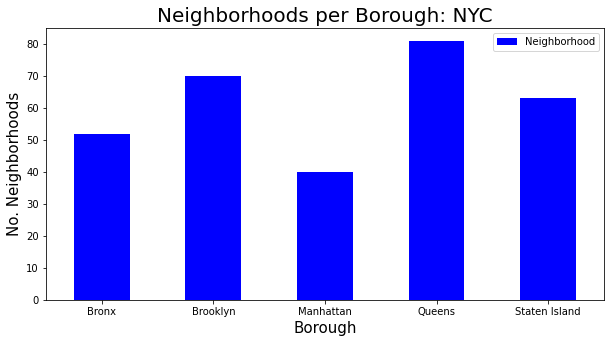

In [21]:
#Visualizing the Neighborhoods in each burrow through a bar graph
clr = "blue"
ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

In [23]:
#Getting all the pizza shops using 'Pizza Place' category in Four Square
column_names=['Borough', 'Neighborhood', 'ID','Name']
pizza_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    pizza_restaurants=venues[venues['Category']=='Pizza Place']   
    print('(',count,'/',len(ny_data),')','Pizza Shops in '+Neighborhood+', '+Borough+':'+str(len(pizza_restaurants)))
    print(row)
    for resturant_detail in pizza_restaurants.values.tolist():
        id, name , category=resturant_detail
        pizza_rest_ny = pizza_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Pizza Shops in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Pizza Shops in Co-op City, Bronx:1
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Pizza Shops in Eastchester, Bronx:1
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Pizza Shops in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Pizza Shops in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Pizza Shops in Kingsbridge, Bronx:6
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Pizza Shops in Marble Hill, Manhattan:1
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Pizza Shops in Woodlawn, Bronx:1
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Pizza Shops in Norwood, Bronx:1
['Bronx', 'Norwood', 40.87722415599446, -73.8793907395681]
( 10 / 306 ) Pi

In [24]:
pizza_rest_ny.to_csv('pizza_rest_ny_tocsv1.csv')
pizza_ny = pd.read_csv('pizza_rest_ny_tocsv1.csv')
pizza_rest_ny.tail()

,Borough,Neighborhood,ID,Name
315,Bronx,Kingsbridge Heights,4c4f92763a6f2d7f79351076,emilio's Pizza
316,Bronx,Kingsbridge Heights,52f5553d11d2e2288f60a8f1,Little Caesars Pizza
317,Bronx,Kingsbridge Heights,4d9fc532e8a6721ec2c429a5,Little Ceasars
318,Brooklyn,Erasmus,4d41f0bfaed776ebb2a56997,Domino's Pizza
319,Brooklyn,Erasmus,4cc4d4cb38aaa093f5801562,Little Ceasars


In [25]:
pizza_rest_ny.shape

(320, 4)

In [26]:
pizza_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Co-op City,4d2cfa5cad25224bbbc5fb8f,Capri II Pizza
1,Bronx,Eastchester,4c632f1cde1b2d7fed31e470,Mario's Pizza
2,Bronx,Kingsbridge,58935fd798f8aa7c14662653,Kingsbridge Social Club
3,Bronx,Kingsbridge,4bb114c4f964a520b9783ce3,Sam's Pizza
4,Bronx,Kingsbridge,4be72770910020a16f1ad514,Broadway Pizza & Pasta


In [30]:
del pizza_ny['Unnamed: 0'] 
pizza_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Co-op City,4d2cfa5cad25224bbbc5fb8f,Capri II Pizza
1,Bronx,Eastchester,4c632f1cde1b2d7fed31e470,Mario's Pizza
2,Bronx,Kingsbridge,58935fd798f8aa7c14662653,Kingsbridge Social Club
3,Bronx,Kingsbridge,4bb114c4f964a520b9783ce3,Sam's Pizza
4,Bronx,Kingsbridge,4be72770910020a16f1ad514,Broadway Pizza & Pasta


In [31]:
pizza_ny.shape

(320, 4)

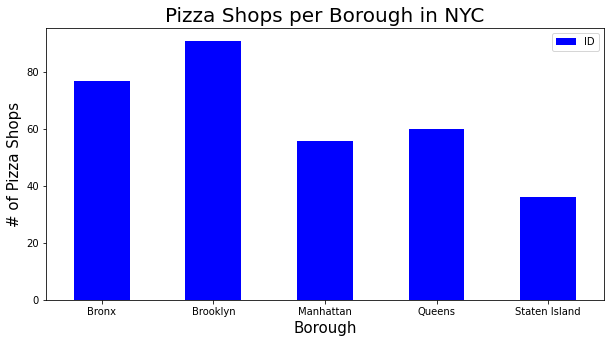

In [32]:
pizza_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Pizza Shops per Borough in NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('# of Pizza Shops', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

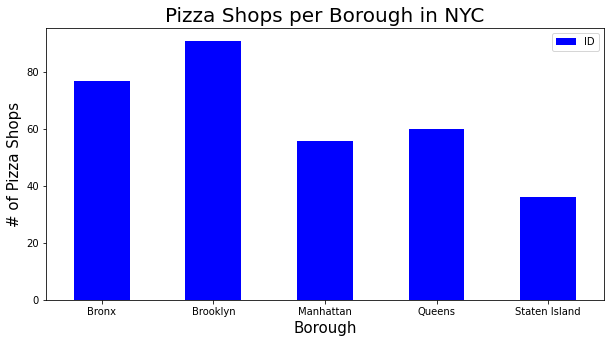

In [33]:
pizza_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Pizza Shops per Borough in NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('# of Pizza Shops', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

#Testing if the data copied over to the CSV properly

In [1]:
#Finding the Venue Details
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
pizza_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in pizza_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(pizza_ny),')','processed')
    pizza_stats_ny = pizza_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
pizza_stats_ny.tail()

NameError: name 'pd' is not defined

In [35]:
pizza_stats_ny.to_csv('pizza_stats_ny_csv.csv')

In [36]:
pizza_stats_ny['Likes'] = pizza_stats_ny['Likes'].astype('float64')
pizza_stats_ny['Tips'] = pizza_stats_ny['Tips'].astype('float64')
pizza_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       320 non-null    object 
 1   Neighborhood  320 non-null    object 
 2   ID            320 non-null    object 
 3   Name          320 non-null    object 
 4   Likes         320 non-null    float64
 5   Rating        320 non-null    float64
 6   Tips          320 non-null    float64
dtypes: float64(3), object(4)
memory usage: 17.6+ KB


In [37]:
best_neigh=pizza_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
best_neigh.columns=['Neighborhood','Average Rating']
best_neigh.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
53,Elmhurst,9.200000
60,Forest Hills Gardens,9.100000
29,Chinatown,9.100000
143,Soho,9.050000
52,Elm Park,9.000000
24,Carnegie Hill,9.000000
160,Upper East Side,8.900000
74,Greenwich Village,8.900000
41,Cypress Hills,8.900000
114,North Side,8.783333


In [38]:
best_borough=pizza_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
best_borough.columns=['Borough','Average Rating']
best_borough.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.028571
1,Brooklyn,6.695604
3,Queens,5.836667
0,Bronx,5.450649
4,Staten Island,4.444444


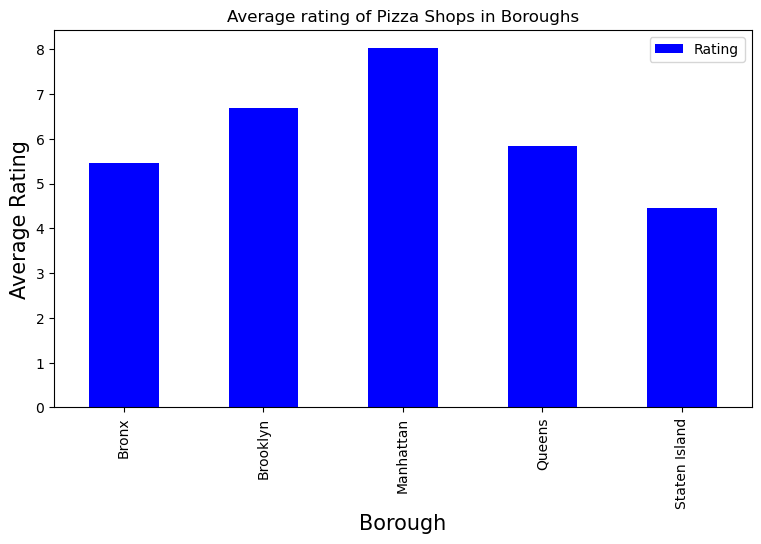

In [39]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Average rating of Pizza Shops in Boroughs')
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
pizza_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar', color=clr)
plt.legend()
plt.show()

In [40]:
best_neigh1=best_neigh[best_neigh['Average Rating']>=8.0]
best_neigh1

,Neighborhood,Average Rating
3,Arrochar,8.200000
6,Battery Park City,8.300000
13,Beechhurst,8.100000
19,Bronxdale,8.600000
20,Brooklyn Heights,8.300000
24,Carnegie Hill,9.000000
28,Chelsea,8.200000
29,Chinatown,9.100000
36,Cobble Hill,8.600000
41,Cypress Hills,8.900000


In [41]:
best_neigh2=pd.merge(best_neigh1,ny_data, on='Neighborhood')
best_neigh2=best_neigh2[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
best_neigh2

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Staten Island,Arrochar,40.596313,-74.067124,8.200000
1,Manhattan,Battery Park City,40.711932,-74.016869,8.300000
2,Queens,Beechhurst,40.792781,-73.804365,8.100000
3,Bronx,Bronxdale,40.852723,-73.861726,8.600000
4,Brooklyn,Brooklyn Heights,40.695864,-73.993782,8.300000
5,Manhattan,Carnegie Hill,40.782683,-73.953256,9.000000
6,Manhattan,Chelsea,40.744035,-74.003116,8.200000
7,Staten Island,Chelsea,40.594726,-74.189560,8.200000
8,Manhattan,Chinatown,40.715618,-73.994279,9.100000
9,Brooklyn,Cobble Hill,40.687920,-73.998561,8.600000


In [50]:
# NYC Map with Pizza Shops with ratings 8 and above
ny_map = folium.Map(location=geo_location('New York'), zoom_start=11)
rating = folium.map.FeatureGroup()
for lat, lng, in best_neigh2[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [52]:
best_neigh2['Label']=best_neigh2['Neighborhood']+', '+best_neigh2['Borough']+'('+best_neigh2['Average Rating'].map(str)+')'
for lat, lng, label in best_neigh2[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
ny_map.add_child(rating)